## ADHD EDA
Data from WiDS Datathon 2025. Predicting gender and ADHD.
- 1213 datapoints
- labels: ADHD (0, 1-ADHD) and gender (0, 1-female)
- features: functional MRI connectome matrices (19900 cols) and patient information (socio-demographic, emotions, and parenting)

Questions:
- missingness (MRI - none missing)
- outliers
- correlation between labels and features

Findings:
- MRI data appears separable by ADHD, not by gender and potentially can be reduced from 19900 to 2600 columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import umap

## Labels

In [2]:
labels = pd.read_excel("../data/TRAIN/TRAINING_SOLUTIONS.xlsx")
conditions = [(labels["ADHD_Outcome"]==1) & (labels["Sex_F"]==1), 
              (labels["ADHD_Outcome"]==1) & (labels["Sex_F"]==0), 
              (labels["ADHD_Outcome"]==0) & (labels["Sex_F"]==1),
              (labels["ADHD_Outcome"]==0) & (labels["Sex_F"]==0),]
values = ["ADHD_F", "ADHD_M", "norm_F", "norm_M"]
labels["dual"] = np.select(conditions, values, default="norm")

labels.head(5)

,participant_id,ADHD_Outcome,Sex_F,dual
0,UmrK0vMLopoR,1,1,ADHD_F
1,CPaeQkhcjg7d,1,0,ADHD_M
2,Nb4EetVPm3gs,1,0,ADHD_M
3,p4vPhVu91o4b,1,1,ADHD_F
4,M09PXs7arQ5E,1,1,ADHD_F


In [3]:
labels.shape

(1213, 4)

In [4]:
labels["dual"].value_counts()

dual
ADHD_M    581
ADHD_F    250
norm_M    216
norm_F    166
Name: count, dtype: int64

## Data MRI

In [5]:
mriDF = pd.read_csv("../data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
mriDF = pd.merge(labels, mriDF, how="left", on="participant_id")

mriDF.head(5)

,participant_id,ADHD_Outcome,Sex_F,dual,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,UmrK0vMLopoR,1,1,ADHD_F,-0.039820,0.177577,0.057224,0.037571,0.118154,0.050951,...,-0.037630,-0.072599,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984
1,CPaeQkhcjg7d,1,0,ADHD_M,0.114480,0.205675,0.079730,0.010349,0.015880,0.111704,...,0.014106,-0.001084,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381
2,Nb4EetVPm3gs,1,0,ADHD_M,0.226402,0.159739,0.113252,0.077601,0.068376,0.105201,...,-0.040456,0.018640,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150
3,p4vPhVu91o4b,1,1,ADHD_F,0.060679,0.047981,0.058570,-0.019773,0.011671,0.128109,...,-0.016356,0.025618,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708
4,M09PXs7arQ5E,1,1,ADHD_F,0.056123,0.178890,0.024387,0.001484,0.090777,0.102894,...,-0.056285,-0.031508,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666


In [6]:
mriDF.shape

(1213, 19904)

In [7]:
mri_cols = [col for col in mriDF.columns if "column" in col]

# no missingness in mri data 
nan_counts = mriDF[mri_cols].isna().sum()
nan_counts.value_counts()

0    19900
Name: count, dtype: int64

#### UMAP Overall 

In [8]:
mri_embed = pd.DataFrame(umap.UMAP(random_state=42).fit_transform(mriDF[mri_cols]), columns=["emb1", "emb2"])
mri_embed[["ADHD_Outcome", "Sex_F", "dual"]] = mriDF[["ADHD_Outcome", "Sex_F", "dual"]]

/Users/erinchinn/mamba/envs/my_env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/erinchinn/mamba/envs/my_env/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


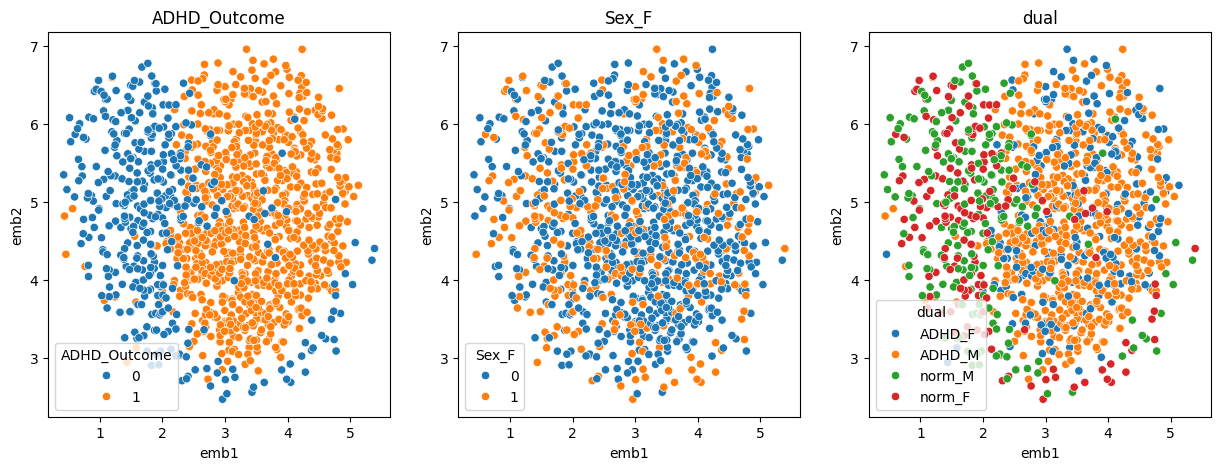

In [9]:
label_list = ["ADHD_Outcome", "Sex_F", "dual"]

fig, axs = plt.subplots(ncols=len(label_list), figsize=(15, 5))
for i, label in enumerate(label_list):
    g = sns.scatterplot(
        data=mri_embed,
        x="emb1", 
        y="emb2", 
        hue=label, 
        ax=axs[i])
    g.set_title(label)

/Users/erinchinn/mamba/envs/my_env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/erinchinn/mamba/envs/my_env/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


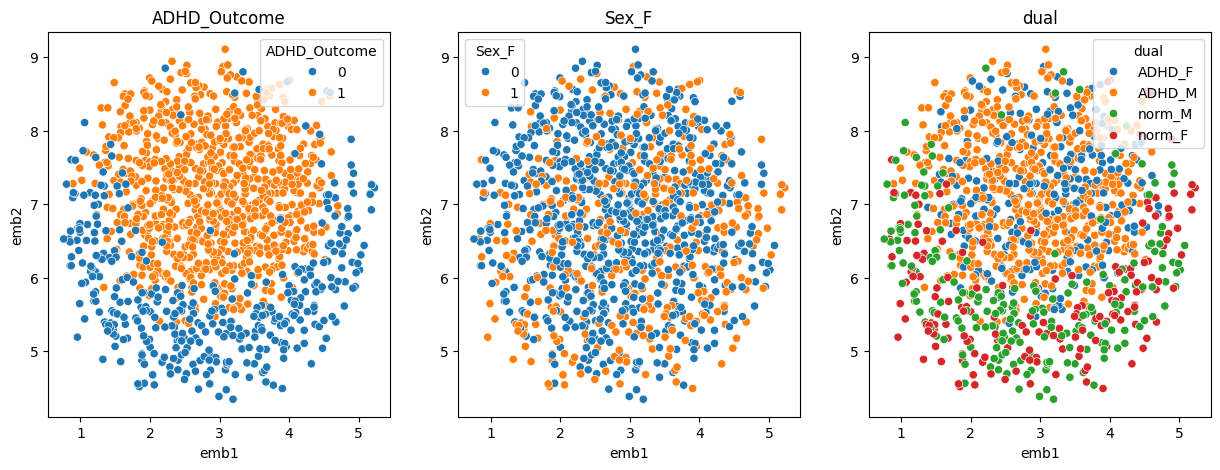

In [10]:
# top columns that have overall difference between ADHD diagnosis
mean_adhd = mriDF.groupby(["ADHD_Outcome"])[mri_cols].mean().reset_index()
cols_diff_adhd = abs(mean_adhd.loc[0, mri_cols] - mean_adhd.loc[1, mri_cols]).sort_values(ascending=False)[:2600].index.to_list()

embed_adhd = pd.DataFrame(umap.UMAP(random_state=42).fit_transform(mriDF[cols_diff_adhd]), columns=["emb1", "emb2"])
embed_adhd[["ADHD_Outcome", "Sex_F", "dual"]] = mriDF[["ADHD_Outcome", "Sex_F", "dual"]]

label_list = ["ADHD_Outcome", "Sex_F", "dual"]

fig, axs = plt.subplots(ncols=len(label_list), figsize=(15, 5))
for i, label in enumerate(label_list):
    g = sns.scatterplot(
        data=embed_adhd,
        x="emb1", 
        y="emb2", 
        hue=label, 
        ax=axs[i])
    g.set_title(label)

/Users/erinchinn/mamba/envs/my_env/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/erinchinn/mamba/envs/my_env/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


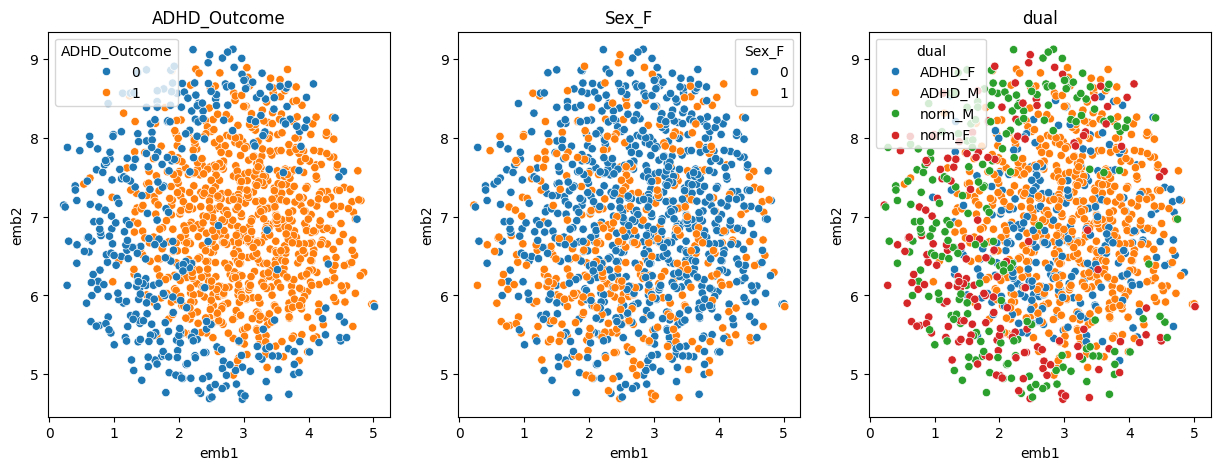

In [11]:
# top cols that have overall difference between gender
mean_gender = mriDF.groupby(["Sex_F"])[mri_cols].mean().reset_index()
cols_diff_gender = abs(mean_gender.loc[0, mri_cols] - mean_gender.loc[1, mri_cols]).sort_values(ascending=False)[:3500].index.to_list()

embed_gender = pd.DataFrame(umap.UMAP(random_state=42).fit_transform(mriDF[cols_diff_gender]), columns=["emb1", "emb2"])
embed_gender[["ADHD_Outcome", "Sex_F", "dual"]] = mriDF[["ADHD_Outcome", "Sex_F", "dual"]]

label_list = ["ADHD_Outcome", "Sex_F", "dual"]

fig, axs = plt.subplots(ncols=len(label_list), figsize=(15, 5))
for i, label in enumerate(label_list):
    g = sns.scatterplot(
        data=embed_gender,
        x="emb1", 
        y="emb2", 
        hue=label, 
        ax=axs[i])
    g.set_title(label)

In [12]:
# meltedmriDF = mriDF[["ADHD_Outcome", "Sex_F"] + interesting_cols].melt(
#     id_vars=["ADHD_Outcome", "Sex_F"], 
#     var_name="column", 
#     value_name="corr")

# sns.catplot(
#     data=meltedmriDF, 
#     x="column", 
#     y="corr", 
#     hue="Sex_F", 
#     kind="strip", 
#     alpha=0.5,
#     height=5, 
#     aspect=1.7,
# )